## Data Description: 

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries.The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this case study we have considered data from year 2000-2015 for 193 countries for further analysis. Dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Variables:

Country- Country

Year- Year

Status- Developed or Developing status

Life Expectancy- Age(years)

Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)

Infant Deaths- Number of Infant Deaths per 1000 population

Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)

Measles- number of reported measles cases per 1000 population

BMI- Average Body Mass Index of entire population

U-5 Deaths- Number of under-five deaths per 1000 population

Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)

Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)

Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)

HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)

GDP- Gross Domestic Product per capita(in USD)

Population- Population Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)

Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)

Income Composition- Human Development Index in terms of income composition of resources(0-1)

Schooling- Number of years of Schooling 

Dataset found at:https://www.kaggle.com/kumarajarshi/life-expectancy-who

## Problem statement

Bulid a multilinear regression model using sklean to predict the life expectancy agaist the relevant repsonse varaibles

## Importing the important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
dt=pd.read_csv('Life Expectancy Data.csv')

In [3]:
dt.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
dt.shape

(2938, 22)

In [44]:
dt.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [45]:
dt.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

# Checking Null Values

In [46]:
dt.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
dt.rename(columns={'Life expectancy ':'Life_Expectancy', 'Adult Mortality':'Adult_Mortality','infant deaths':'Infant_Deaths','percentage expenditure':'Percentage_Exp', 'Hepatitis B':'Hepatitis_B', 'Measles ':'Measles', ' BMI ':'BMI',
                          'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_Exp','Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
                          ' thinness  1-19 years':'thinness_1_to_19', ' thinness 5-9 years':'thinness_5_to_9', 'Income composition of resources':'Income_Composition'}, inplace=True)

## Dealing with null  values

> * **Replacing all the null values with mode**

In [6]:
def impute_nan(df,variable):
    med_val=df[variable].mode()[0]
    df[variable].fillna(med_val,inplace=True)

In [7]:
impute_nan(dt,'Life_Expectancy')

In [8]:
impute_nan(dt,'Adult_Mortality')

In [9]:
impute_nan(dt,'Alcohol')

In [10]:
impute_nan(dt,'Hepatitis_B')

In [11]:
impute_nan(dt,'GDP')

In [12]:
impute_nan(dt,'Polio')

In [13]:
impute_nan(dt,'Total_Exp')

In [14]:
impute_nan(dt,'Diphtheria')

In [15]:
impute_nan(dt,'Population')

In [16]:
impute_nan(dt,'thinness_1_to_19')

In [17]:
impute_nan(dt,'thinness_5_to_9')

In [18]:
impute_nan(dt,'Income_Composition')

In [19]:
impute_nan(dt,'Schooling')

In [20]:
impute_nan(dt,'BMI')

In [21]:
dt.isnull().sum()

Country               0
Year                  0
Status                0
Life_Expectancy       0
Adult_Mortality       0
Infant_Deaths         0
Alcohol               0
Percentage_Exp        0
Hepatitis_B           0
Measles               0
BMI                   0
under_five_deaths     0
Polio                 0
Total_Exp             0
Diphtheria            0
HIV/AIDS              0
GDP                   0
Population            0
thinness_1_to_19      0
thinness_5_to_9       0
Income_Composition    0
Schooling             0
dtype: int64

## Feature-Engineering

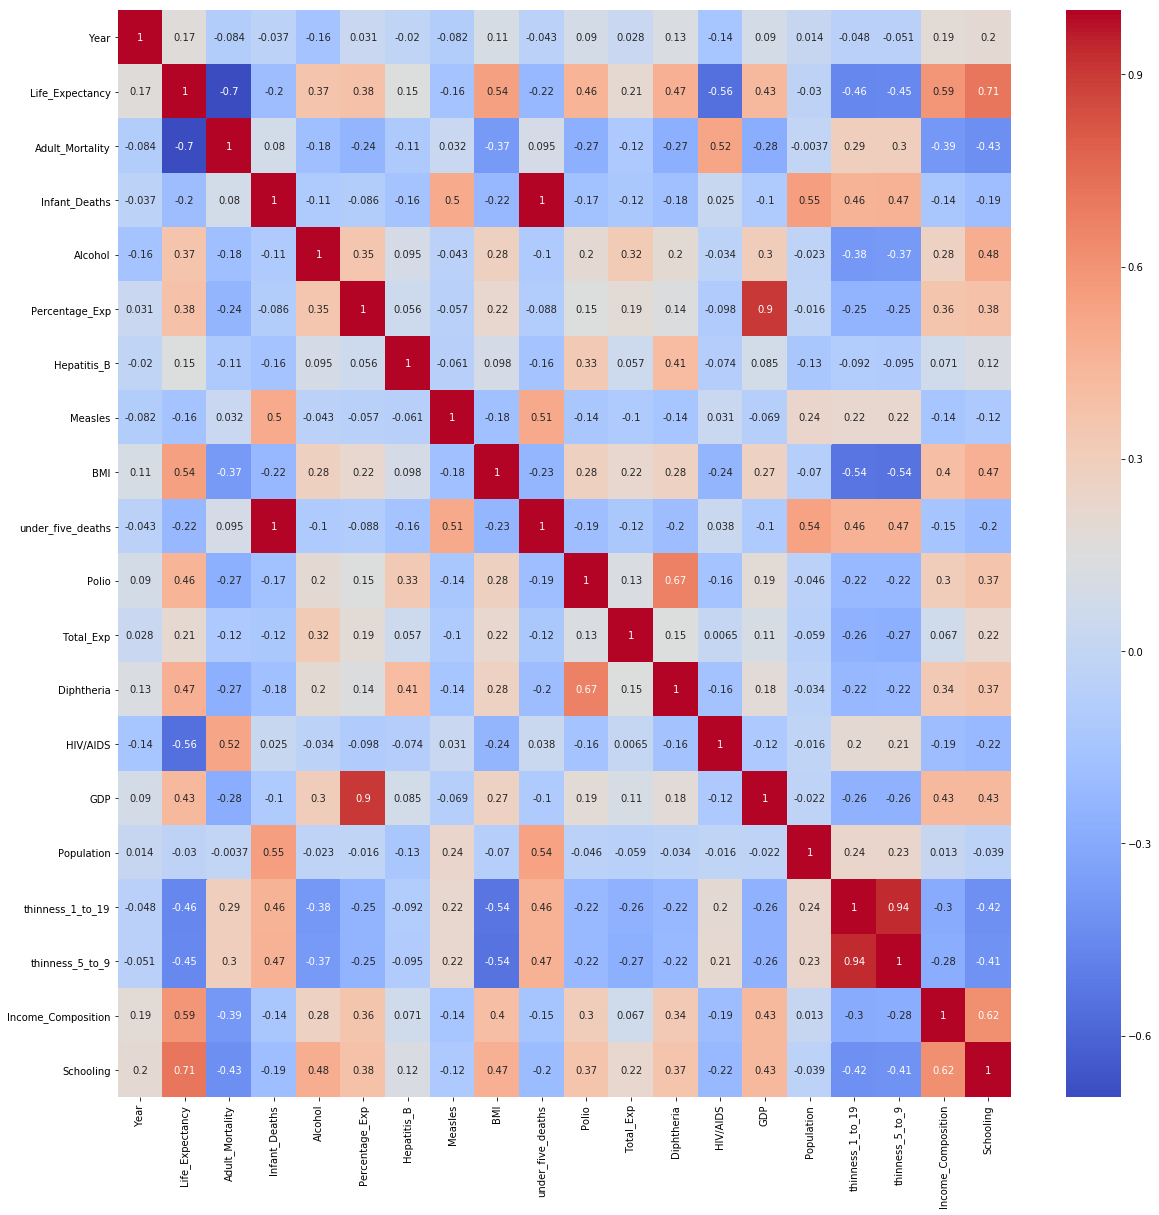

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(dt.corr(),annot=True,cmap='coolwarm')

In [24]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

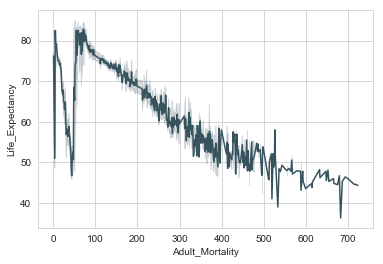

In [25]:
sns.lineplot(x='Adult_Mortality',y='Life_Expectancy',data=dt)

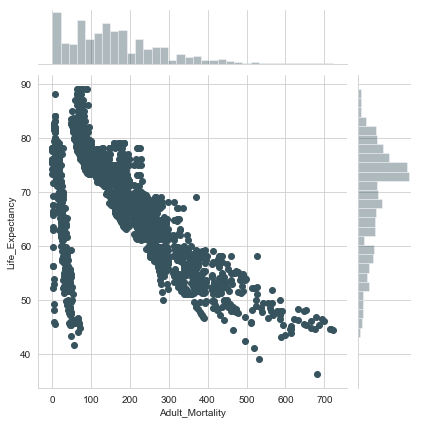

In [68]:
sns.jointplot(x='Adult_Mortality',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows Life Expectancy increses when the adult mortality value is between 0 to 100. But once it crosses 100 Life Expectancy is decresing**

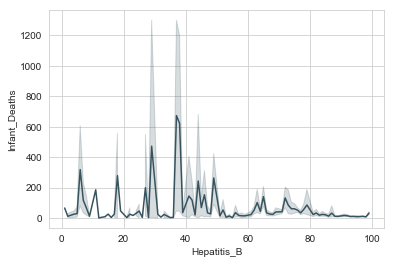

In [32]:
sns.lineplot(x='Hepatitis_B',y='Infant_Deaths',data=dt)

#### Observation
* **This graph shows when the hepatitis B amount is increasing infant death number is decresing**

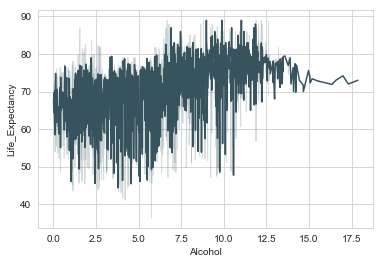

In [71]:
sns.lineplot(x='Alcohol',y='Life_Expectancy',data=dt)

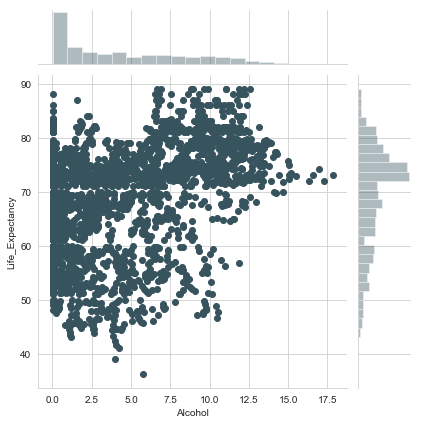

In [72]:
sns.jointplot(x='Alcohol',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows no relation between alcohol consumption and Life expectancy**

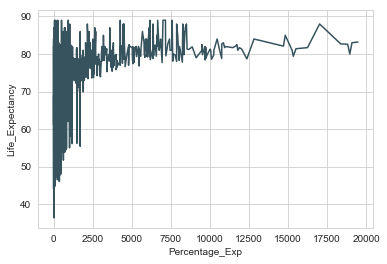

In [73]:
sns.lineplot(x='Percentage_Exp',y='Life_Expectancy',data=dt)

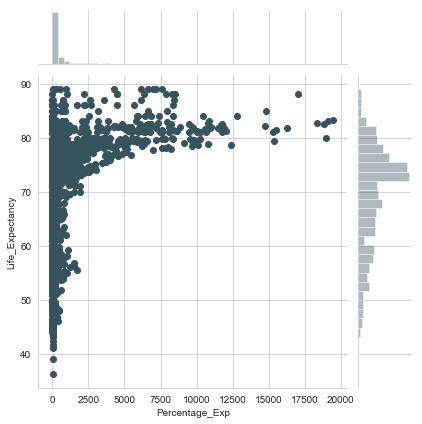

In [74]:
sns.jointplot(x='Percentage_Exp',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows when the amount of Percentage_exp(Expenditure on health) is increasing life expectancy is also increasing**

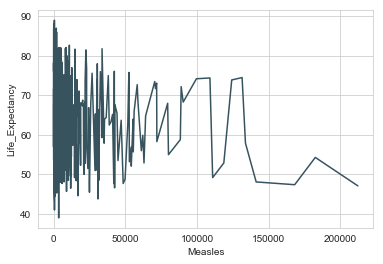

In [77]:
sns.lineplot(x='Measles',y='Life_Expectancy',data=dt)

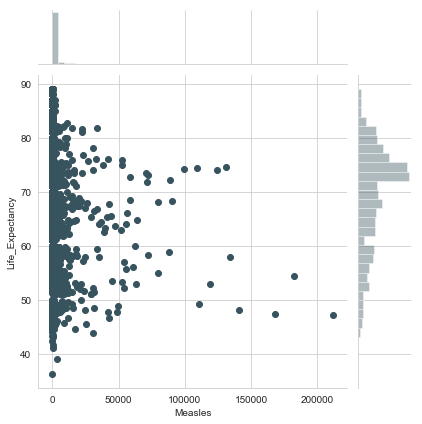

In [78]:
sns.jointplot(x='Measles',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows when the Measles count is increasing Life expectency is decreasing**

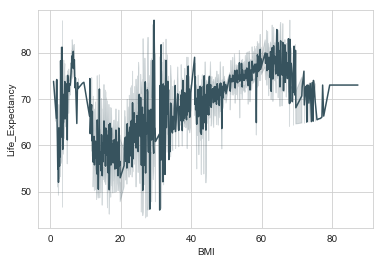

In [79]:
sns.lineplot(x='BMI',y='Life_Expectancy',data=dt)

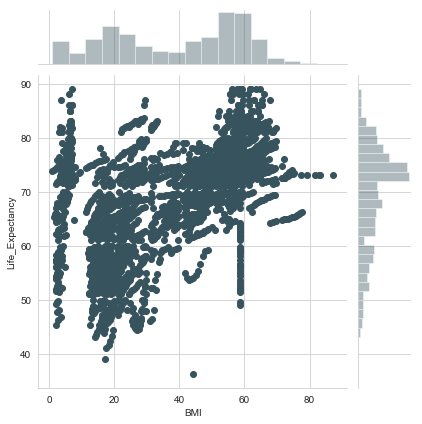

In [80]:
sns.jointplot(x='BMI',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows the best BMI for higher life expectancy is between 20-30. If the BMI increases life expectency will decrease**

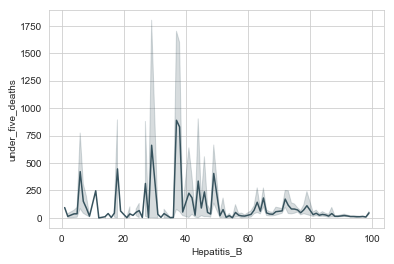

In [34]:
sns.lineplot(x='Hepatitis_B',y='under_five_deaths',data=dt)

#### Observation
* **This graph shows when the hepatitis B amount is increasing under 5 death number is decresing**

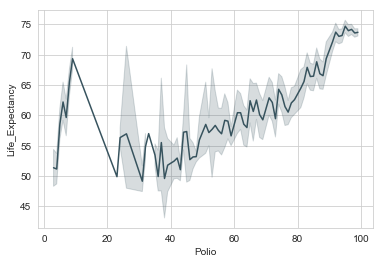

In [83]:
sns.lineplot(x='Polio',y='Life_Expectancy',data=dt)

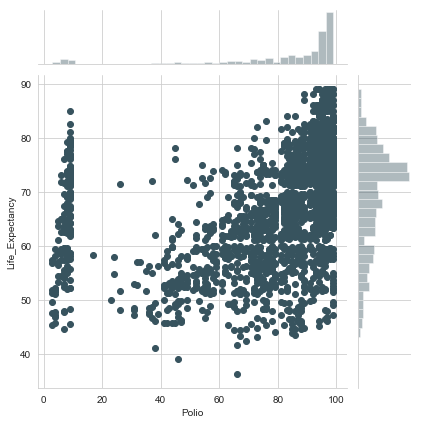

In [84]:
sns.jointplot(x='Polio',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows when the Polio dose  is increasing life expectency is increasing**

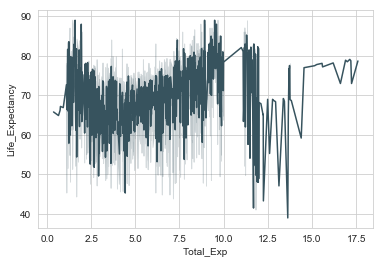

In [35]:
sns.lineplot(x='Total_Exp',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows no such relation between total exp and life expectency**

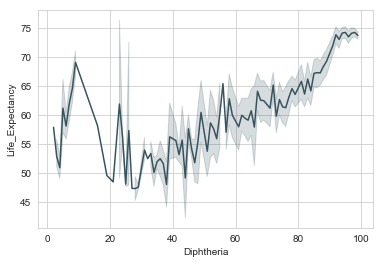

In [87]:
sns.lineplot(x='Diphtheria',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows when the diphtheria dose amount  is increasing life expectency is increasing**

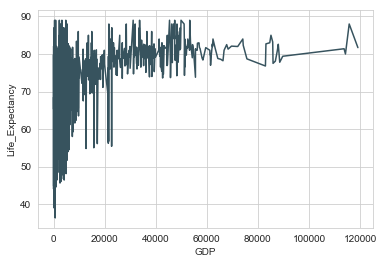

In [93]:
sns.lineplot(x='GDP',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows no such relation between GDP and life expectency**

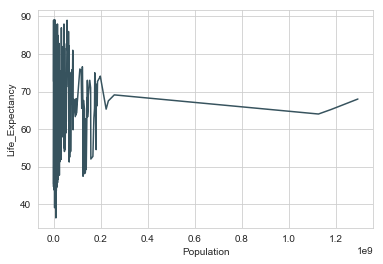

In [95]:
sns.lineplot(x='Population',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows no such relation between Population and life expectency**

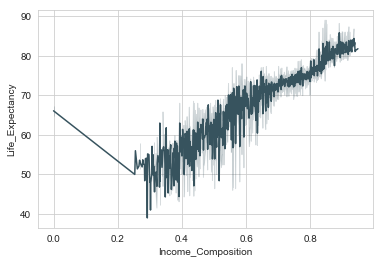

In [101]:
sns.lineplot(x='Income_Composition',y='Life_Expectancy',data=dt)

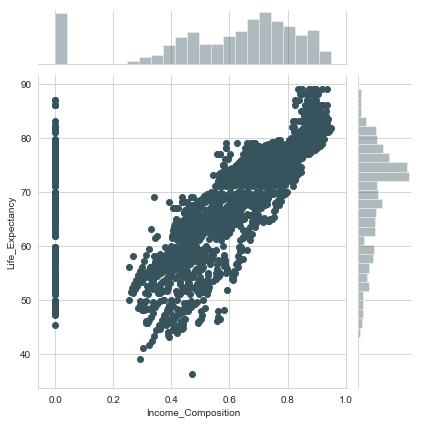

In [102]:
sns.jointplot(x='Income_Composition',y='Life_Expectancy',data=dt)

#### Observation
* **This graph shows with the increase of Income composition life expectency is increasing**

## Feature-Selection

In [37]:
def correlation_feature(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation_feature(dt, 0.9)
len(set(corr_features))

3

In [39]:
corr_features

{'GDP', 'thinness_5_to_9', 'under_five_deaths'}

* **These three input paramter are highly co-related. So we can drop this columns**

In [40]:
dt.drop(['GDP','thinness_5_to_9','under_five_deaths','Country','Status','Year'],axis=1,inplace=True)

In [41]:
x1= dt.drop(['Life_Expectancy'],axis =1)
y1 = dt['Life_Expectancy']

In [42]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2
ordered_rank_features=SelectKBest(score_func=f_classif,k=10)
ordered_feature=ordered_rank_features.fit(x1,y1)
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(x1.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1,sort=True)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Adult_Mortality,11.336488
1,Infant_Deaths,1.626988
2,Alcohol,3.198352
3,Percentage_Exp,5.491928
4,Hepatitis_B,1.312014
5,Measles,1.688737
6,BMI,4.391890
7,Polio,3.545823
8,Total_Exp,2.068601
9,Diphtheria,3.725045


In [43]:
features_rank.nlargest(10,'Score')

,Features,Score
10,HIV/AIDS,15.384446
14,Schooling,11.377843
0,Adult_Mortality,11.336488
13,Income_Composition,5.752841
3,Percentage_Exp,5.491928
6,BMI,4.391890
12,thinness_1_to_19,3.793112
9,Diphtheria,3.725045
7,Polio,3.545823
2,Alcohol,3.198352


> By chi2 method we detect the above parameter which are highly co-related with the target parameter

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x1,y1)
print(model.feature_importances_)

[0.27574297 0.01115243 0.01497791 0.00695041 0.00445194 0.00291595
 0.06699498 0.04232902 0.0073112  0.04038815 0.1302481  0.00311419
 0.02922185 0.27869629 0.0855046 ]


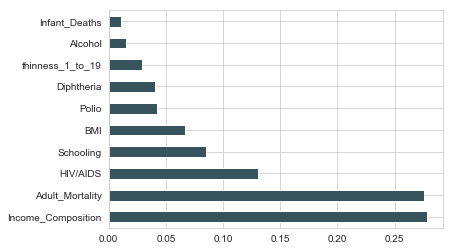

In [46]:
fet_import=pd.Series(model.feature_importances_,index=x1.columns)
fet_import.nlargest(10).plot(kind='barh')
plt.show()

In [47]:
fet_import.nlargest(10)

Income_Composition    0.278696
Adult_Mortality       0.275743
HIV/AIDS              0.130248
Schooling             0.085505
BMI                   0.066995
Polio                 0.042329
Diphtheria            0.040388
thinness_1_to_19      0.029222
Alcohol               0.014978
Infant_Deaths         0.011152
dtype: float64

> We also applied the Extratree classifier method to detect the highly co-related parameter with the target paramter

## Model Development
* **In this section I will use differnt machine learning algorithm to predict the life expentancy for the available data set**

## Performance Metric
* **I am going to use R square value as performance metric. The intution behind R square value is when R square is closer to 1 indicates that it's a better model**

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [49]:
x_train.shape,y_train.shape

((2056, 15), (2056,))

## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
model_pred_tr=model_lr.predict(x_train)
model_pred_test=model_lr.predict(x_test)

In [51]:
print('R2 square for train',r2_score(y_train,model_pred_tr))
print('R2 square for test',r2_score(y_test,model_pred_test))

R2 square for train 0.8051684822381356
R2 square for test 0.8090039390740309


#### Observation
> As We know if R square vale is close to 1 it indicate that it's a good model <br/>
> From the above R square value for train and test I can see that both are not  close to 1 <br/>
> For both train and test set my model is giving same value for R Square which indicate that model is not over fit

Text(0, 0.5, 'Predicted Life Expentancy ')

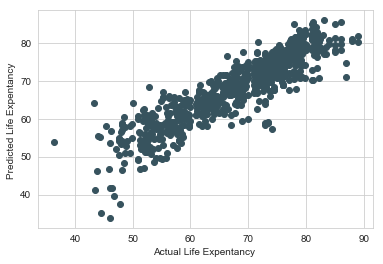

In [52]:
plt.scatter(y_test,model_pred_test)
plt.xlabel('Actual Life Expentancy ')
plt.ylabel('Predicted Life Expentancy ')

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
model_rand=RandomForestRegressor()
model_rand.fit(x_train,y_train)
model_rand_train=model_rand.predict(x_train)
model_rand_test=model_rand.predict(x_test)

In [54]:
print('R2 square for train',r2_score(y_train,model_rand_train))
print('R2 square for test',r2_score(y_test,model_rand_test))

R2 square for train 0.99380949907537
R2 square for test 0.9646788263758393


#### Observation
> From Random forest model I am getting R2 square value more closer to 1 which indicate that this model is better than Linear Regression model  <br/>

Text(0, 0.5, 'Predicted Life Expentancy ')

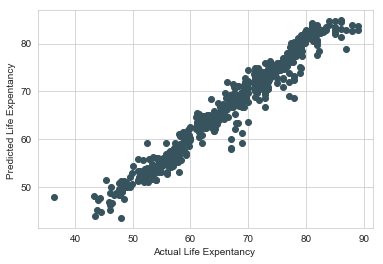

In [55]:
plt.scatter(y_test,model_rand_test)
plt.xlabel('Actual Life Expentancy ')
plt.ylabel('Predicted Life Expentancy ')

## Fine Tune my model 

In [56]:
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,3,4]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
           ]

In [57]:
from sklearn.model_selection import GridSearchCV
grid_RandomForest = GridSearchCV(RandomForestRegressor(),param_grid)
grid_RandomForest.fit(x_train,y_train)
grid_RandomForest.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [58]:
gridtrain_RandomForest_predict = grid_RandomForest.predict(x_train)
gridtest_RandomForest_predict = grid_RandomForest.predict(x_test)

In [59]:
print('R2 square for train',r2_score(y_train,gridtrain_RandomForest_predict))
print('R2 square for test',r2_score(y_test,gridtest_RandomForest_predict))

R2 square for train 0.9999999989067815
R2 square for test 0.9587737711500905


#### Observation
> By Applying GridSearchCV with Random forest algorithm we got R2 value close to 1   <br/>

Text(0, 0.5, 'Predicted Life Expantancy ')

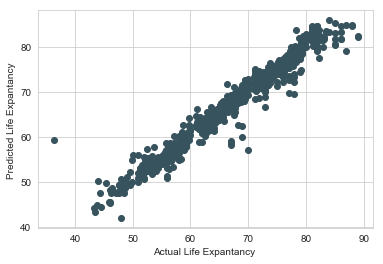

In [60]:
plt.scatter(y_test,gridtest_RandomForest_predict)
plt.xlabel('Actual Life Expantancy ')
plt.ylabel('Predicted Life Expantancy ')

In [61]:
parameters_lr = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gridlr = GridSearchCV(LinearRegression(),parameters_lr, cv=5)
gridlr.fit(x_train,y_train)

C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:155: FutureWa

C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to 

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [62]:
gridlr.best_score_

0.7984352240216869

In [63]:
gridlr_tr = gridlr.predict(x_train)
gridlr_test = gridlr.predict(x_test)

In [64]:
print('R2 square for train',r2_score(y_train,gridlr_tr))
print('R2 square for test',r2_score(y_test,gridlr_test))

R2 square for train 0.8051684822381356
R2 square for test 0.8090039390739864


#### Observation
> By Applying GridSearchCV with Linear Regression algorithm we got R2 value whic is not close to 1   <br/>

Text(0, 0.5, 'Predicted Life Expantancy ')

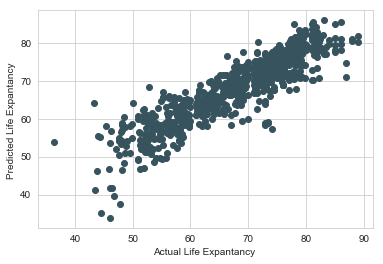

In [65]:
plt.scatter(y_test,gridlr_test)
plt.xlabel('Actual Life Expantancy ')
plt.ylabel('Predicted Life Expantancy ')

> Applying Linear regression and random forest algorithm to a reduce dataset
. The dataset cretaed with the parameter that are highly co-related with the target parameter</br>


In [66]:
dt_chi2=dt[['HIV/AIDS','Schooling','Adult_Mortality','Income_Composition',
           'Percentage_Exp','BMI','thinness_1_to_19','Diphtheria','Polio','Alcohol',
            'Life_Expectancy']].copy()

In [67]:
dt_chi2.head()

,HIV/AIDS,Schooling,Adult_Mortality,Income_Composition,Percentage_Exp,BMI,thinness_1_to_19,Diphtheria,Polio,Alcohol,Life_Expectancy
0,0.1,10.1,263.0,0.479,71.279624,19.1,17.2,65.0,6.0,0.01,65.0
1,0.1,10.0,271.0,0.476,73.523582,18.6,17.5,62.0,58.0,0.01,59.9
2,0.1,9.9,268.0,0.470,73.219243,18.1,17.7,64.0,62.0,0.01,59.9
3,0.1,9.8,272.0,0.463,78.184215,17.6,17.9,67.0,67.0,0.01,59.5
4,0.1,9.5,275.0,0.454,7.097109,17.2,18.2,68.0,68.0,0.01,59.2


In [68]:
x_chi=dt_chi2.drop(['Life_Expectancy'],axis=1)
y_chi=dt['Life_Expectancy']

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_chi,y_chi,test_size=0.3,random_state=42)

In [70]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
model_pred_tr=model_lr.predict(x_train)
model_pred_test=model_lr.predict(x_test)

In [71]:
print('R2 square for train',r2_score(y_train,model_pred_tr))
print('R2 square for test',r2_score(y_test,model_pred_test))

R2 square for train 0.8017807461664883
R2 square for test 0.8070799449511562


Text(0, 0.5, 'Predicted Life Expentency ')

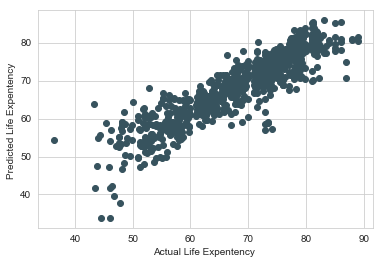

In [72]:
plt.scatter(y_test,model_pred_test)
plt.xlabel('Actual Life Expentency ')
plt.ylabel('Predicted Life Expentency ')

In [73]:
model_rand=RandomForestRegressor()
model_rand.fit(x_train,y_train)
model_rand_train=model_rand.predict(x_train)
model_rand_test=model_rand.predict(x_test)

In [74]:
print('R2 square for train',r2_score(y_train,model_rand_train))
print('R2 square for test',r2_score(y_test,model_rand_test))

R2 square for train 0.9941476475319271
R2 square for test 0.9617346767097761


Text(0, 0.5, 'Predicted Life Expentency ')

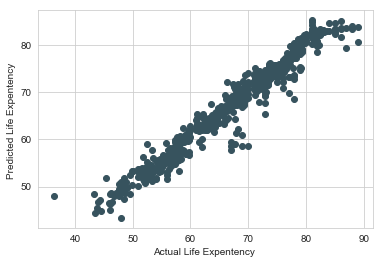

In [75]:
plt.scatter(y_test,model_rand_test)
plt.xlabel('Actual Life Expentency ')
plt.ylabel('Predicted Life Expentency ')

#### Observation
> By Applying Linear Regression and Random forest  we got better R2 value for random forest <br/>

## Scalling of Data

In [76]:
min_dt=dt.min()
range_dt=(dt-min_dt).max()
dt_scaled = (dt-min_dt)/range_dt

In [77]:
dt_scaled.head()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,BMI,Polio,Total_Exp,Diphtheria,HIV/AIDS,Population,thinness_1_to_19,Income_Composition,Schooling
0,0.544592,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.031250,0.452118,0.649485,0.0,0.026074,0.619565,0.505274,0.487923
1,0.447818,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.572917,0.453279,0.618557,0.0,0.000253,0.630435,0.502110,0.483092
2,0.447818,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.614583,0.450377,0.639175,0.0,0.024525,0.637681,0.495781,0.478261
3,0.440228,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.666667,0.473012,0.670103,0.0,0.002857,0.644928,0.488397,0.473430
4,0.434535,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.677083,0.435287,0.680412,0.0,0.002302,0.655797,0.478903,0.458937


In [78]:
x= dt_scaled.drop(['Life_Expectancy'],axis =1)
y = dt_scaled['Life_Expectancy']

In [79]:
x.head()

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,BMI,Polio,Total_Exp,Diphtheria,HIV/AIDS,Population,thinness_1_to_19,Income_Composition,Schooling
0,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.031250,0.452118,0.649485,0.0,0.026074,0.619565,0.505274,0.487923
1,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.572917,0.453279,0.618557,0.0,0.000253,0.630435,0.502110,0.483092
2,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.614583,0.450377,0.639175,0.0,0.024525,0.637681,0.495781,0.478261
3,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.666667,0.473012,0.670103,0.0,0.002857,0.644928,0.488397,0.473430
4,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.677083,0.435287,0.680412,0.0,0.002302,0.655797,0.478903,0.458937


In [80]:
y.head()

0    0.544592
1    0.447818
2    0.447818
3    0.440228
4    0.434535
Name: Life_Expectancy, dtype: float64

In [81]:
dt_scaled.dtypes

Life_Expectancy       float64
Adult_Mortality       float64
Infant_Deaths         float64
Alcohol               float64
Percentage_Exp        float64
Hepatitis_B           float64
Measles               float64
BMI                   float64
Polio                 float64
Total_Exp             float64
Diphtheria            float64
HIV/AIDS              float64
Population            float64
thinness_1_to_19      float64
Income_Composition    float64
Schooling             float64
dtype: object

In [82]:
x=dt_scaled.drop('Life_Expectancy',axis=1)
y=dt_scaled['Life_Expectancy']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [84]:
x_train.shape,y_train.shape

((2056, 15), (2056,))

In [85]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
model_pred_tr=model_lr.predict(x_train)
model_pred_test=model_lr.predict(x_test)

In [86]:
print('R2 square for train',r2_score(y_train,model_pred_tr))
print('R2 square for test',r2_score(y_test,model_pred_test))

R2 square for train 0.8051684822381356
R2 square for test 0.8090039390739865


Text(0, 0.5, 'Predicted Life Expentancy ')

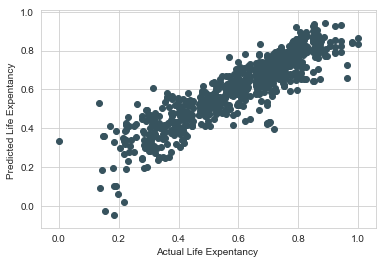

In [87]:
plt.scatter(y_test,model_pred_test)
plt.xlabel('Actual Life Expentancy ')
plt.ylabel('Predicted Life Expentancy ')

In [88]:
model_rand=RandomForestRegressor()
model_rand.fit(x_train,y_train)
model_rand_train=model_rand.predict(x_train)
model_rand_test=model_rand.predict(x_test)

In [89]:
print('R2 square for train',r2_score(y_train,model_rand_train))
print('R2 square for test',r2_score(y_test,model_rand_test))

R2 square for train 0.9940911114907933
R2 square for test 0.9649233388262511


Text(0, 0.5, 'Predicted Life Expentancy ')

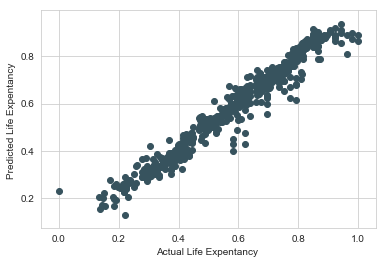

In [90]:
plt.scatter(y_test,model_rand_test)
plt.xlabel('Actual Life Expentancy ')
plt.ylabel('Predicted Life Expentancy ')

In [91]:
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,3,4]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
           ]

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
grid_RandomForest = GridSearchCV(RandomForestRegressor(),param_grid)

In [94]:
grid_RandomForest.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}])

In [95]:
grid_RandomForest.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [96]:
gridtrain_RandomForest_predict = grid_RandomForest.predict(x_train)

In [97]:
gridtest_RandomForest_predict = grid_RandomForest.predict(x_test)

In [98]:
print('R2 square for train',r2_score(y_train,gridtrain_RandomForest_predict))
print('R2 square for test',r2_score(y_test,gridtest_RandomForest_predict))

R2 square for train 1.0
R2 square for test 0.9589648778823351


Text(0, 0.5, 'Predicted Life Expantancy ')

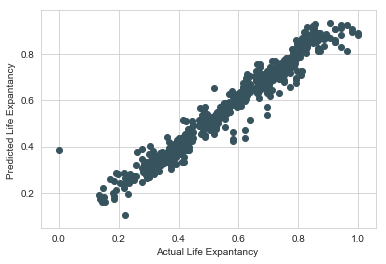

In [99]:
plt.scatter(y_test,gridtest_RandomForest_predict)
plt.xlabel('Actual Life Expantancy ')
plt.ylabel('Predicted Life Expantancy ')

In [100]:
parameters_lr = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [101]:
gridlr = GridSearchCV(LinearRegression(),parameters_lr, cv=5)

In [102]:
gridlr.fit(x_train,y_train)

C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:155: FutureWa

C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Subhasish Das\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [103]:
gridlr.best_score_

0.7984352240216869

In [104]:
gridlr_tr = gridlr.predict(x_train)
gridlr_test = gridlr.predict(x_test)

In [105]:
print('R2 square for train',r2_score(y_train,gridlr_tr))
print('R2 square for test',r2_score(y_test,gridlr_test))

R2 square for train 0.8051684822381356
R2 square for test 0.8090039390739864


#### Observation
> After applying Random forest and Linear regression and grid serach cv we got best R2 square result for Random forest <br/>
> So we can conclude that the model we created using Random forest algorith is the best model for our data set</br> 